In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
ev = pd.read_csv(r"/content/ev_cars_tidy.csv", header=0)

# Back up the original dataset
ev_backup = ev.copy()

# Display the first few rows
print("Dataset Loaded:\n", ev.head())


Dataset Loaded:
                                name                    ev_type  \
0                     Opel Ampera-e  Battery Electric Vehicle    
1         Renault Kangoo Maxi ZE 33  Battery Electric Vehicle    
2                       Nissan Leaf  Battery Electric Vehicle    
3  Audi e-tron Sportback 55 quattro  Battery Electric Vehicle    
4            Porsche Taycan Turbo S  Battery Electric Vehicle    

   battery_capacity  acceleration  top_speed  range  efficiency  \
0              58.0           7.3        150    335         173   
1              31.0          22.4        130    160         194   
2              36.0           7.9        144    220         164   
3              86.5           5.7        200    375         231   
4              83.7           2.8        260    390         215   

   fast_charge_speed              drive  number_of_seats  price_in_germany  \
0              210.0  Front Wheel Drive                5           42990.0   
1                NaN  Front

In [ ]:
# Check for missing values
print("Missing values per column:\n", ev.isnull().sum())

# Fill missing values
numerical_cols = ev.select_dtypes(include=np.number).columns
ev[numerical_cols] = ev[numerical_cols].fillna(ev[numerical_cols].mean())

for column in ev.select_dtypes(include=['object']).columns:
    ev[column] = ev[column].fillna(ev[column].mode()[0])

# Verify missing values are handled
print("\nMissing values after handling:\n", ev.isnull().sum())


Missing values per column:
 name                  0
ev_type               0
battery_capacity      0
acceleration          0
top_speed             0
range                 0
efficiency            0
fast_charge_speed     5
drive                 0
number_of_seats       0
price_in_germany      9
price_in_uk          41
price_in_us           0
dtype: int64

Missing values after handling:
 name                 0
ev_type              0
battery_capacity     0
acceleration         0
top_speed            0
range                0
efficiency           0
fast_charge_speed    0
drive                0
number_of_seats      0
price_in_germany     0
price_in_uk          0
price_in_us          0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
for column in ev.select_dtypes(include=['object']).columns:
    ev[column] = label_encoder.fit_transform(ev[column])

# Verify encoding
print("\nEncoded Data:\n", ev.head())



Encoded Data:
    name  ev_type  battery_capacity  acceleration  top_speed  range  \
0    96        0              58.0           7.3        150    335   
1   126        0              31.0          22.4        130    160   
2    93        0              36.0           7.9        144    220   
3    15        0              86.5           5.7        200    375   
4   124        0              83.7           2.8        260    390   

   efficiency  fast_charge_speed  drive  number_of_seats  price_in_germany  \
0         173         210.000000      1                5      42990.000000   
1         194         485.465116      1                5      58725.386905   
2         164         230.000000      1                5      29990.000000   
3         231         600.000000      0                5      58725.386905   
4         215         860.000000      0                4     186336.000000   

     price_in_uk  price_in_us  
0   52939.058824      45999.3  
1   31680.000000      38016.0 

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale numerical columns
scaler = StandardScaler()
numerical_columns = ev.select_dtypes(include=['float64', 'int64']).columns
ev[numerical_columns] = scaler.fit_transform(ev[numerical_columns])

# Verify scaling
print("\nScaled Data:\n", ev.head())



Scaled Data:
        name  ev_type  battery_capacity  acceleration  top_speed     range  \
0  0.241266      0.0         -0.308561     -0.159143  -0.643335 -0.035028   
1  0.847859      0.0         -1.394271      4.625341  -1.119282 -1.511199   
2  0.180607      0.0         -1.193213      0.030969  -0.786119 -1.005083   
3 -1.396535      0.0          0.837467     -0.666108   0.546532  0.302383   
4  0.807420      0.0          0.724874     -1.584982   1.974373  0.428912   

   efficiency  fast_charge_speed     drive  number_of_seats  price_in_germany  \
0   -0.660406      -1.156524e+00  0.138088        -0.180001         -0.495080   
1   -0.018479       2.386538e-16  0.138088        -0.180001          0.000000   
2   -0.935518      -1.072555e+00  0.138088        -0.180001         -0.904098   
3    1.112536       4.808680e-01 -1.148309        -0.180001          0.000000   
4    0.623448       1.572463e+00 -1.148309        -1.207752          4.014996   

   price_in_uk  price_in_us  
0    

In [ ]:
# Separate features and target
X = ev.drop(columns=['price_in_germany'])  # Replace with the correct target column
y = ev['price_in_germany']

print("\nFeatures (X):\n", X.head())
print("\nTarget (y):\n", y.head())



Features (X):
        name  ev_type  battery_capacity  acceleration  top_speed     range  \
0  0.241266      0.0         -0.308561     -0.159143  -0.643335 -0.035028   
1  0.847859      0.0         -1.394271      4.625341  -1.119282 -1.511199   
2  0.180607      0.0         -1.193213      0.030969  -0.786119 -1.005083   
3 -1.396535      0.0          0.837467     -0.666108   0.546532  0.302383   
4  0.807420      0.0          0.724874     -1.584982   1.974373  0.428912   

   efficiency  fast_charge_speed     drive  number_of_seats  price_in_uk  \
0   -0.660406      -1.156524e+00  0.138088        -0.180001     0.000000   
1   -0.018479       2.386538e-16  0.138088        -0.180001    -0.849124   
2   -0.935518      -1.072555e+00  0.138088        -0.180001    -1.076193   
3    1.112536       4.808680e-01 -1.148309        -0.180001     1.076867   
4    0.623448       1.572463e+00 -1.148309        -1.207752     3.430636   

   price_in_us  
0    -0.481819  
1    -0.729742  
2    -0.94160

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and Testing Data Sizes:")
print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")



Training and Testing Data Sizes:
x_train: (141, 12), x_test: (36, 12)
y_train: (141,), y_test: (36,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Make Predictions
y_pred = linear_model.predict(x_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print Metrics
print("\nLinear Regression Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R2 Score: {r2:.3f}")



Linear Regression Metrics:
Mean Absolute Error (MAE): 0.127
Mean Squared Error (MSE): 0.034
Root Mean Squared Error (RMSE): 0.183
R2 Score: 0.973


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Support Vector Regressor (SVR)": SVR()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }

# Display results for all models
print("\nModel Comparison:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.3f}")



Model Comparison:

Linear Regression:
MAE: 0.127
MSE: 0.034
RMSE: 0.183
R2: 0.973

Random Forest:
MAE: 0.239
MSE: 0.203
RMSE: 0.451
R2: 0.834

Decision Tree:
MAE: 0.211
MSE: 0.161
RMSE: 0.401
R2: 0.868

Support Vector Regressor (SVR):
MAE: 0.312
MSE: 0.739
RMSE: 0.860
R2: 0.396


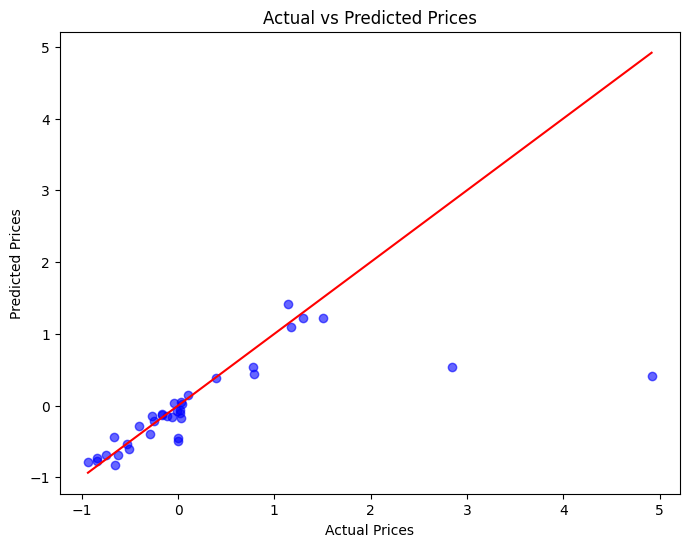

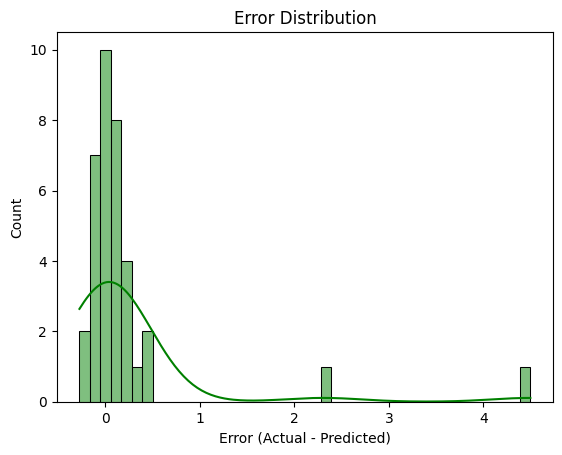

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a results DataFrame
Results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Scatter plot for Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(Results['Actual'], Results['Predicted'], color='blue', alpha=0.6)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.plot([Results['Actual'].min(), Results['Actual'].max()],
         [Results['Actual'].min(), Results['Actual'].max()], color='red')
plt.show()

# Error Distribution
errors = Results['Actual'] - Results['Predicted']
sns.histplot(errors, kde=True, color='green')
plt.title("Error Distribution")
plt.xlabel("Error (Actual - Predicted)")
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Correct imports
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


# Define models and their hyperparameter grids
models = {
    'Linear Regression (Ridge)': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1, 10, 100]
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Support Vector Regressor (SVR)': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'rbf', 'poly'],
            'C': [0.1, 1, 10, 100],
            'epsilon': [0.1, 0.2, 0.5, 1]
        }
    }
}

# ... (rest of your code)


# Results dictionary to store evaluation metrics
results = {}

# Loop through models and perform hyperparameter tuning
for model_name, model_info in models.items():
    print(f"Tuning {model_name}...")

    # Use GridSearchCV or RandomizedSearchCV
    grid = GridSearchCV(
        estimator=model_info['model'],
        param_grid=model_info['params'],
        scoring='r2',
        cv=5,
        verbose=1
    )
    grid.fit(x_train, y_train)

    # Best model and its performance
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)

    # Store metrics
    metrics = {
        'Best Parameters': grid.best_params_,
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R²': r2_score(y_test, y_pred)
    }
    results[model_name] = metrics

    print(f"Finished tuning {model_name}.\n")

# Print all results
print("Model Performance Summary:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


Tuning Linear Regression (Ridge)...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Finished tuning Linear Regression (Ridge).

Tuning Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Finished tuning Random Forest.

Tuning Decision Tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Finished tuning Decision Tree.

Tuning Support Vector Regressor (SVR)...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Finished tuning Support Vector Regressor (SVR).

Model Performance Summary:

Linear Regression (Ridge):
Best Parameters: {'alpha': 1}
MAE: 0.11622968429597459
MSE: 0.02781431783112709
RMSE: 0.16677625080066732
R²: 0.9772486521918016

Random Forest:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MAE: 0.2296212193136206
MSE: 0.18280845509153065
RMSE: 0.4275610542267977
R²: 0.8504677062612572

Decision Tree:
Best Parameters: {'max_depth': None, 'min_samples_lea

In [ ]:
from joblib import dump
dump(best_model, 'best_model.pkl')


['best_model.pkl']